# SA-2025 WEEK-4 GRADED ASSIGNMENT

> Census Income 

Predict whether annual income of an individual exceeds $50K/yr based on census data

### <b>Description</b>


The Census Income Dataset, also known as the Adult Dataset, is a widely used dataset from the UCI Machine Learning Repository for binary classification tasks. The goal is to predict whether an individual earns more than $50,000 per year based on various demographic and employment-related attributes. The dataset consists of 14 input features, including age, workclass, education, marital status, occupation, race, sex, hours worked per week, and more. It contains both continuous and categorical variables, with missing values represented by the symbol ?. The target variable is income, which has two classes: <=50K and >50K. This dataset is commonly used to explore data preprocessing techniques, evaluate classification algorithms, and analyze fairness and bias in machine learning models.



### <b>Data description</b>

This dataset contains census data extracted from the 1994 U.S. Census database. It is used to predict whether a person earns more than $50,000 per year based on their personal and professional attributes.

<code>age</code> – Continuous. Age of the individual.

<code>workclass</code> – Categorical. Type of employment (e.g., Private, Self-emp-not-inc, Government).

<code>fnlwgt</code> – Continuous. Final weight, representing the number of people the census believes the entry represents.

<code>education</code> – Categorical. Highest level of education attained (e.g., Bachelors, HS-grad).

<code>education-num</code> – Continuous. Numeric representation of education level (e.g., Bachelors = 13).

<code>marital-status</code> – Categorical. Marital status (e.g., Married-civ-spouse, Never-married).

<code>occupation</code> – Categorical. Type of job (e.g., Tech-support, Craft-repair, Sales).

<code>relationship</code> – Categorical. Relationship to the household (e.g., Husband, Not-in-family).

<code>race</code> – Categorical. Race of the individual (e.g., White, Black, Asian-Pac-Islander).

<code>sex</code> – Categorical. Gender of the individual (Male or Female).

<code>capital-gain</code> – Continuous. Income from capital gains.

<code>capital-loss</code> – Continuous. Losses from capital.

<code>hours-per-week</code> – Continuous. Number of hours worked per week.

<code>native-country</code> – Categorical. Country of origin (e.g., United States, Mexico).

<code>income</code> – Categorical (Target Variable). Whether the individual's income is <=50K or >50K annually.



IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,f1_score

Define the Names of the Columns

In [ ]:
columns = [
    'age','workclass','fnlwgt','education','education-num',
    'marital-status','occupation','relationship','race','sex',
    'capital-gain','capital-loss','hours-per-week','native-country','income'
]

Load the DataSet

In [3]:
df_train = pd.read_csv('adult.data',names=columns,header=None,skipinitialspace=True)
df_test =pd.read_csv('adult.test',names=columns,header=0,comment='|',skipinitialspace=True)

Print the Shape of the datasets 

In [4]:
print("Shape of Training Data:",df_train.shape)
print("Shape of Testing dataset :",df_test.shape)

Shape of Training Data: (32561, 15)
Shape of Testing dataset : (16280, 15)


Training Data

In [5]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Now Print the Test DataFrame

In [6]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


Describe the Train DataFrame

In [7]:
df_train.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


See if there are any duplicates 

In [8]:
df_train.duplicated().sum()

np.int64(24)

Make a Count Plot to See how the WorkClass is being distributed 

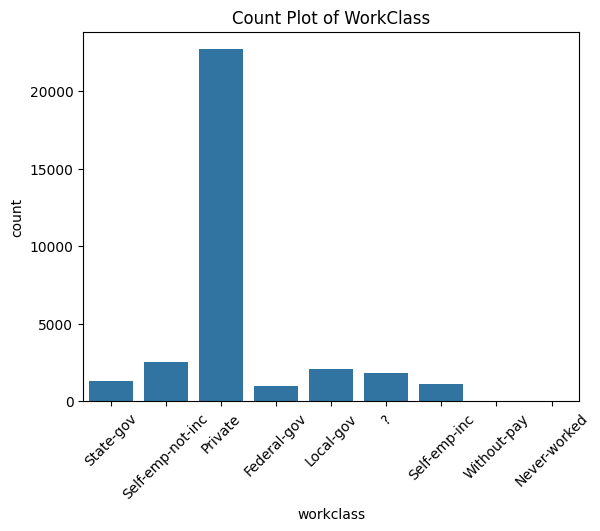

In [9]:
sns.countplot(data=df_train,x='workclass')
plt.title("Count Plot of WorkClass")
plt.xticks(rotation=45)
plt.show()

We have found something unusual in workclass feature,some Nan value are replaced by '?'
Check it with other features too..

In [10]:
(df_train=='?').sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Lets also Look at the Income distribution of both test and train data 

In [11]:
df_test['income'].value_counts()

income
<=50K.    12434
>50K.      3846
Name: count, dtype: int64

In [12]:
df_train['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [13]:
df_train['capital-gain'].value_counts().head(10)

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
3103        97
5178        97
4386        70
5013        69
8614        55
Name: count, dtype: int64

Okay here comes something very different we can observe the 99999 to be very completely different from the rest which needs some attention . Lets us try to replace this with Nan for our further analysis

Okay looks like in testing data there is an extra fullstop after the class name

We can observe that all the values of fnlwgt are unique so lets drop that column


So make some necessary changes in both the datasets

In [14]:
def changes(data):
    data['capital-gain']=data['capital-gain'].replace(99999, np.nan)
    data['workclass']=data['workclass'].replace('?', np.nan)
    data['native-country']=data['native-country'].replace('?', np.nan)
    data['occupation']=data['occupation'].replace('?', np.nan)
    data['income']=data['income'].str.rstrip('.').astype('category')
    data=data.drop('fnlwgt',axis=1)
    data=data.drop_duplicates()
    data['income']=(data['income']=='>50K').astype(int)
    return data
df_train = changes(df_train)
df_test=changes(df_test)
df=df_train


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29096 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29096 non-null  int64  
 1   workclass       27464 non-null  object 
 2   education       29096 non-null  object 
 3   education-num   29096 non-null  int64  
 4   marital-status  29096 non-null  object 
 5   occupation      27457 non-null  object 
 6   relationship    29096 non-null  object 
 7   race            29096 non-null  object 
 8   sex             29096 non-null  object 
 9   capital-gain    28938 non-null  float64
 10  capital-loss    29096 non-null  int64  
 11  hours-per-week  29096 non-null  int64  
 12  native-country  28516 non-null  object 
 13  income          29096 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 3.3+ MB


In [16]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,29096.000000,27464,29096,29096.000000,29096,27457,29096,29096,29096,28938.000000,29096.000000,29096.000000,28516,29096.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,19621,8886,NaN,13249,3885,11506,24438,19246,NaN,NaN,NaN,25721,NaN
mean,39.251340,NaN,NaN,10.102695,NaN,NaN,NaN,NaN,NaN,658.352720,97.175179,40.637820,NaN,0.247800
std,13.687157,NaN,NaN,2.645194,NaN,NaN,NaN,NaN,NaN,2690.727981,424.008232,12.735418,NaN,0.431743
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,38.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [17]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,0


EXPLORATORY DATA ANALYSIS

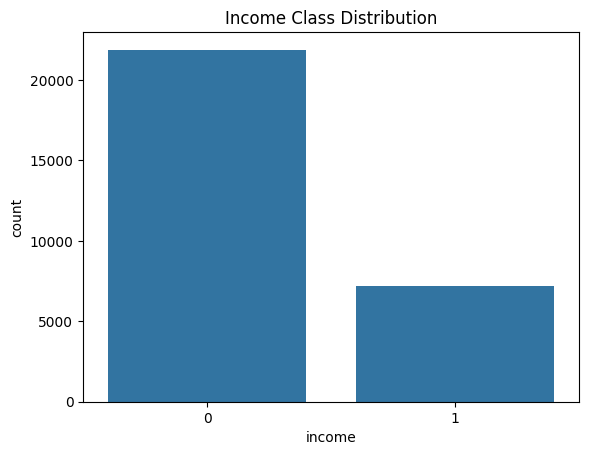

In [18]:
sns.countplot(data=df, x='income')
plt.title("Income Class Distribution")
plt.show()

The target value looks unbalanced i.e the income class contains class 0 in a larger Number 

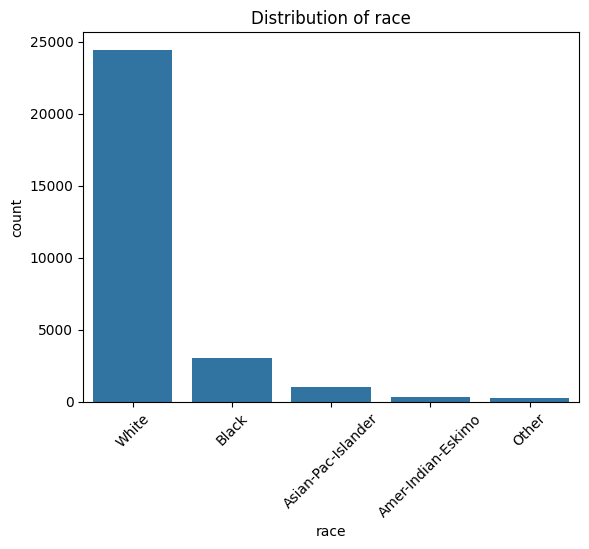

In [19]:
sns.countplot(data=df, x='race')
plt.xticks(rotation=45)
plt.title('Distribution of race')
plt.show()

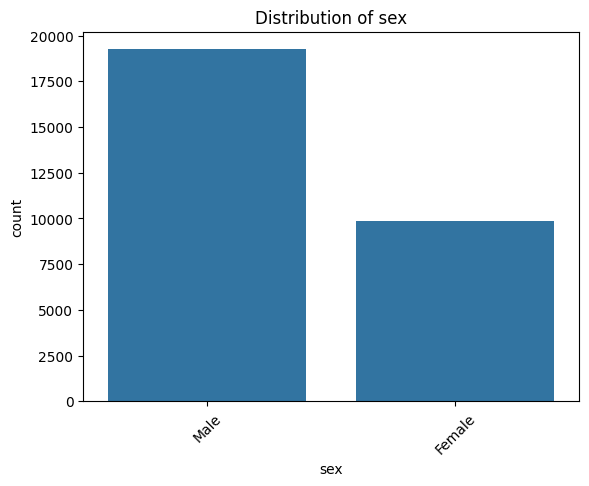

In [20]:
sns.countplot(data=df, x='sex')
plt.xticks(rotation=45)
plt.title('Distribution of sex')
plt.show()

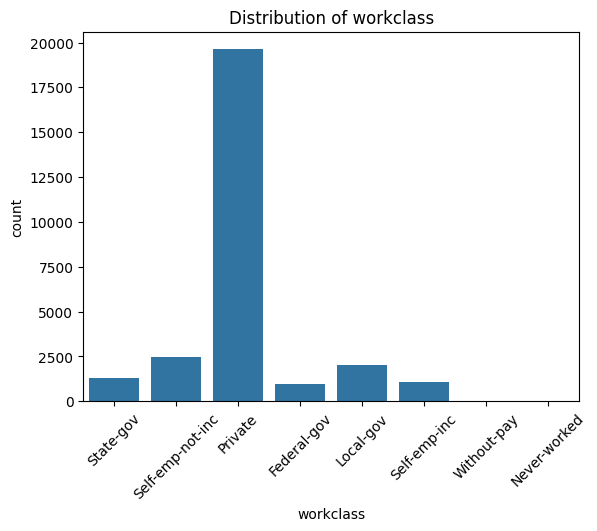

In [21]:
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=45)
plt.title('Distribution of workclass')
plt.show()

1.Private is the dominant class in workclass Feature

2.White and Male are dominant race and gender respectively 

Perform Some Analysis on numerical columns too

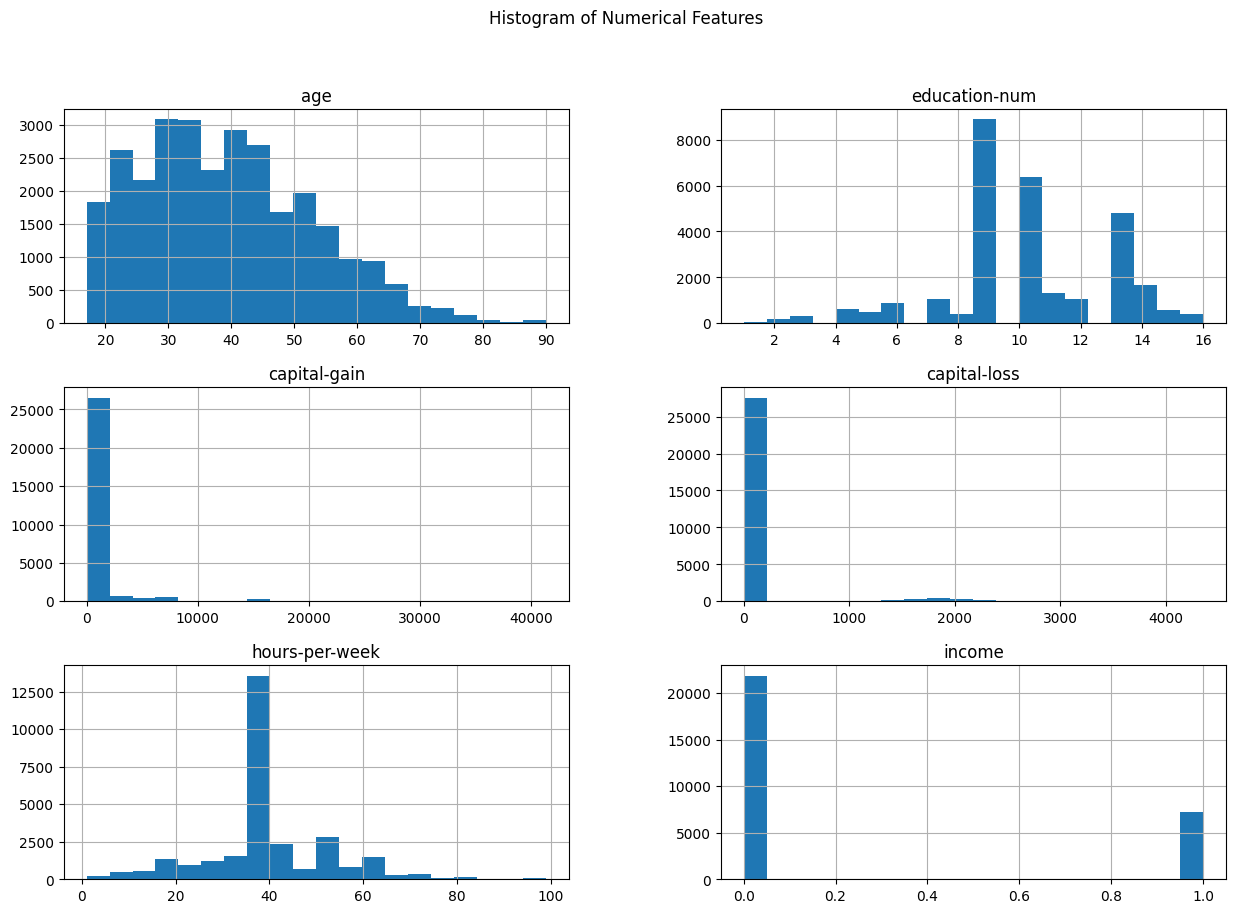

In [22]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

Capital-gain and Capital Loss are highly skewed 

Most of the People work for about 40 hours-per-week

Lets Perform Some Bivariate analysis for some more insights

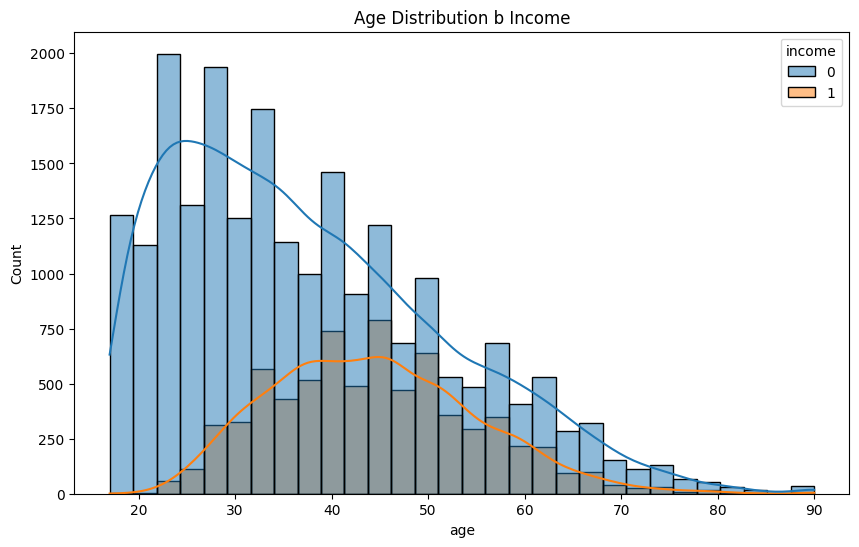

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='age',hue='income',bins=30,kde=True)
plt.title("Age Distribution b Income")
plt.show()

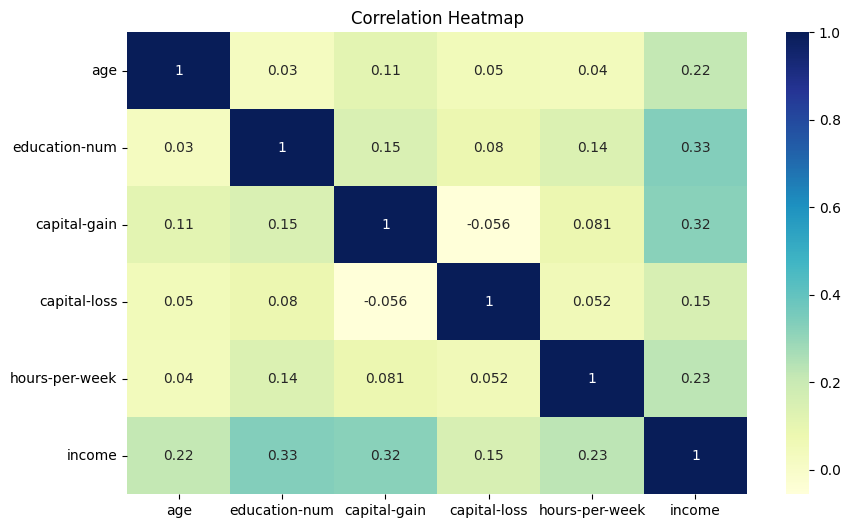

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

Education-num and capital gain have a very slight correlation with income 

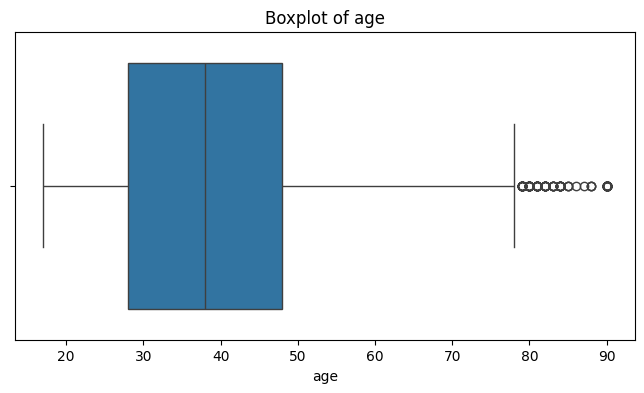

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.show()


Age column has several outliers!!

Before we perform Data Cleaning split both the categorical and Numerical columns 

In [26]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

DATA CLEANING 

Use a Simple Imputer to fill the missing values based on Mean and Mode 

In [27]:
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(strategy='mean')
df_train[numerical_cols]=num_impute.fit_transform(df_train[numerical_cols])
df_test[numerical_cols]=num_impute.transform(df_test[numerical_cols])
cat_impute = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols]=cat_impute.fit_transform(df_train[categorical_cols])
df_test[categorical_cols]=cat_impute.transform(df_test[categorical_cols])

Use Label Encoding to handle the categorical columns 

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col]) 
    label_encoders[col] = le

Convert All the Float columns to int 

In [29]:
def casting(data):
    float_cols = data.select_dtypes(include='float64').columns
    data[float_cols] = data[float_cols].astype(int)
    return data
df_test=casting(df_test)
df_train=casting(df_train)

In [30]:
df_train.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,9,13,2,3,0,4,1,5178,0,40,38,1


Feature Scaling 

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
df_train[num_cols]=scale.fit_transform(df_train[num_cols])
df_test[num_cols]=scale.transform(df_test[num_cols])

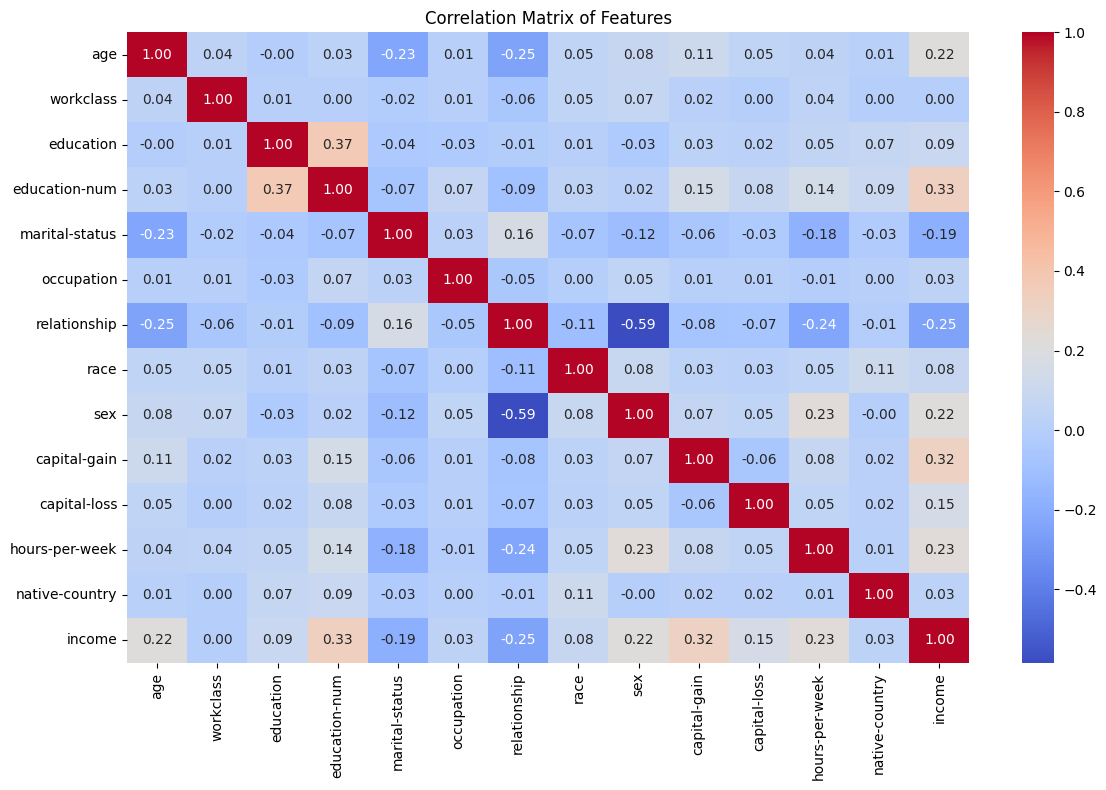

In [32]:
corr_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

MODEL TRAINING AND EVALUATION USING DIFFERENT ALGORITHMS 

Split the data into test and training data 

In [33]:
X_train = df_train.drop('income',axis=1)
y_train = df_train['income']
X_test = df_test.drop('income',axis=1)
y_test = df_test['income']

Before classifying the model lets make a proper reusable function that does that evaluation and tuning part for different models 

In [34]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
results=[]
def evaluate(X_train,X_test,y_train,y_test,model,params,model_name):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    grid = GridSearchCV(model,params,scoring='f1',cv=cv,n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model =grid.best_estimator_
    print(f"Best Parameters : {grid.best_params_}")
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:,1]
    results.append({
        "Model":model_name,
        "Estimator":best_model,
        "Accuracy":accuracy_score(y_test,y_pred),
        "F1_Score":f1_score(y_test,y_pred),
        "ROC_AUC_SCORE":roc_auc_score(y_test,y_prob)
    }
    )
    print("classification_report:\n ", classification_report(y_test,y_pred))
    print("accuracy_score: ", accuracy_score(y_test,y_pred))
    print('f1_score :',f1_score(y_test,y_pred))
    print("roc_auc_score:",roc_auc_score(y_test,y_prob))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

1.Decision Tree Classifier

Best Parameters : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
classification_report:
                precision    recall  f1-score   support

           0       0.89      0.92      0.90     11603
           1       0.71      0.64      0.68      3655

    accuracy                           0.85     15258
   macro avg       0.80      0.78      0.79     15258
weighted avg       0.85      0.85      0.85     15258

accuracy_score:  0.851946519858435
f1_score : 0.6759431932290919
roc_auc_score: 0.8971809851997095


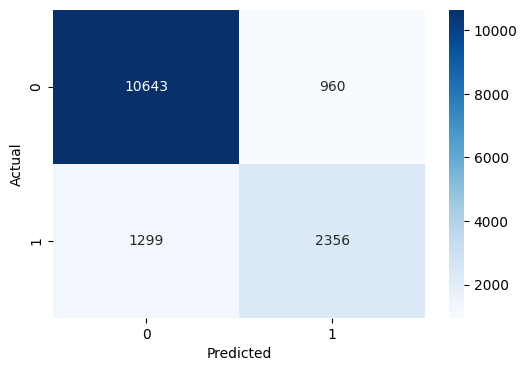

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_params = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}
evaluate(X_train,X_test,y_train,y_test,DecisionTreeClassifier(random_state=1),dt_params,"DecisionTreeClassifier")

2.Random Forest Classifier 

Best Parameters : {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
classification_report:
                precision    recall  f1-score   support

           0       0.89      0.94      0.91     11603
           1       0.76      0.62      0.68      3655

    accuracy                           0.86     15258
   macro avg       0.82      0.78      0.80     15258
weighted avg       0.86      0.86      0.86     15258

accuracy_score:  0.8615152706776773
f1_score : 0.6806709989421188
roc_auc_score: 0.9131734646200396


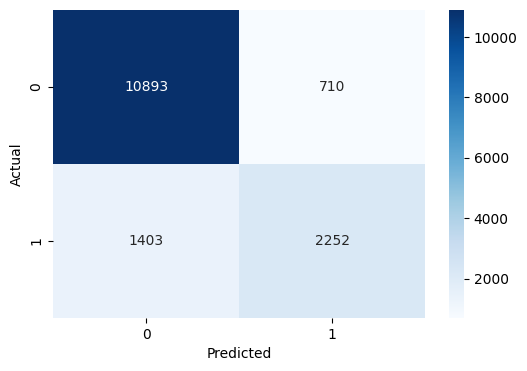

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True,False]
}
evaluate(X_train,X_test,y_train,y_test,RandomForestClassifier(random_state=1),rf_params,"RandomForestClassifier")

3.Gradient Boosting 

Best Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
classification_report:
                precision    recall  f1-score   support

           0       0.90      0.94      0.92     11603
           1       0.77      0.66      0.71      3655

    accuracy                           0.87     15258
   macro avg       0.83      0.80      0.81     15258
weighted avg       0.87      0.87      0.87     15258

accuracy_score:  0.8707563245510552
f1_score : 0.7098293113596233
roc_auc_score: 0.9258906695789442


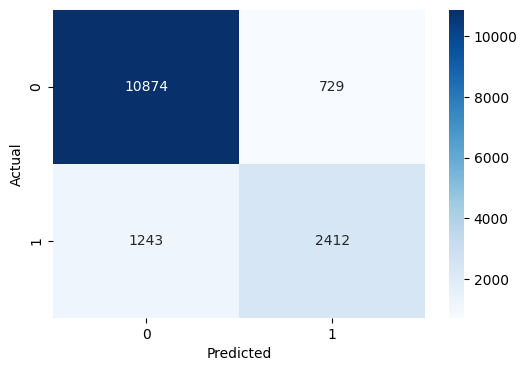

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb_params = {
    'n_estimators': [100,200],
    'learning_rate': [0.1,0.05],
    'max_depth': [3,5],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}
evaluate(X_train,X_test,y_train,y_test,GradientBoostingClassifier(random_state=1),gb_params,"GradientBoostingClassifier")

Best Parameters : {'estimator__max_depth': 3, 'learning_rate': 1.5, 'n_estimators': 100}
classification_report:
                precision    recall  f1-score   support

           0       0.89      0.93      0.91     11603
           1       0.75      0.64      0.69      3655

    accuracy                           0.86     15258
   macro avg       0.82      0.78      0.80     15258
weighted avg       0.86      0.86      0.86     15258

accuracy_score:  0.8611875737318129
f1_score : 0.6877027425538189
roc_auc_score: 0.9162429689099935


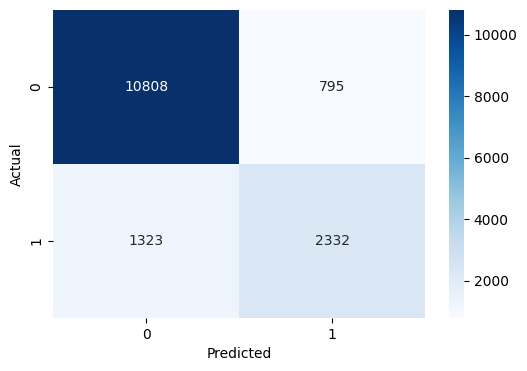

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_params = {
    'n_estimators': [50,100],
    'learning_rate': [0.5,1.0,1.5],
    'estimator__max_depth': [1,2,3]
}
base_estimator = DecisionTreeClassifier(random_state=1)
evaluate(X_train,X_test,y_train,y_test,AdaBoostClassifier(estimator=base_estimator,random_state=1),ada_params,"AdaBoostClassifier")

4.XGBoost

Best Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
classification_report:
                precision    recall  f1-score   support

           0       0.90      0.94      0.92     11603
           1       0.77      0.66      0.71      3655

    accuracy                           0.87     15258
   macro avg       0.83      0.80      0.81     15258
weighted avg       0.87      0.87      0.87     15258

accuracy_score:  0.8708218639402281
f1_score : 0.709420610349403
roc_auc_score: 0.9262527864096659


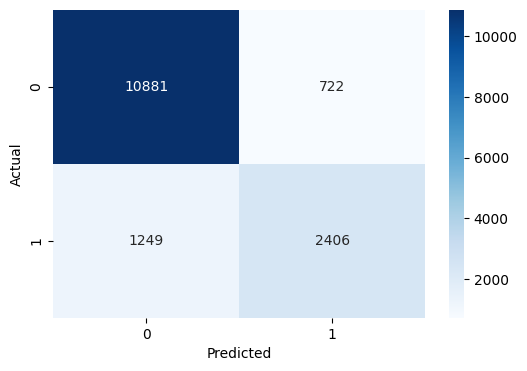

In [39]:
from xgboost import XGBClassifier
xgb_params = {
    'n_estimators': [100,200],
    'learning_rate': [0.05,0.1],
    'max_depth': [3,5,7]
}
evaluate(X_train,X_test,y_train,y_test,XGBClassifier(eval_metric='logloss',random_state=1),xgb_params,"XGBClassifier")

5.LightGBM

[LightGBM] [Info] Number of positive: 7210, number of negative: 21886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 29096, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247800 -> initscore=-1.110378
[LightGBM] [Info] Start training from score -1.110378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

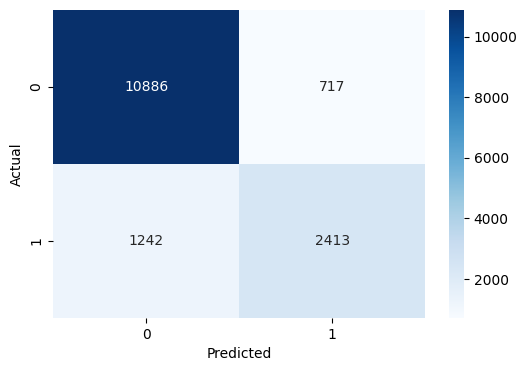

In [40]:
from lightgbm import LGBMClassifier
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
evaluate(X_train,X_test,y_train,y_test,LGBMClassifier(random_state=1),lgbm_params,"LGBMClassifier")

6.K-Nearest Neighbors

Best Parameters : {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
classification_report:
                precision    recall  f1-score   support

           0       0.88      0.91      0.89     11603
           1       0.68      0.59      0.63      3655

    accuracy                           0.84     15258
   macro avg       0.78      0.75      0.76     15258
weighted avg       0.83      0.84      0.83     15258

accuracy_score:  0.8354305937868659
f1_score : 0.6319800674190239
roc_auc_score: 0.8762322070345268


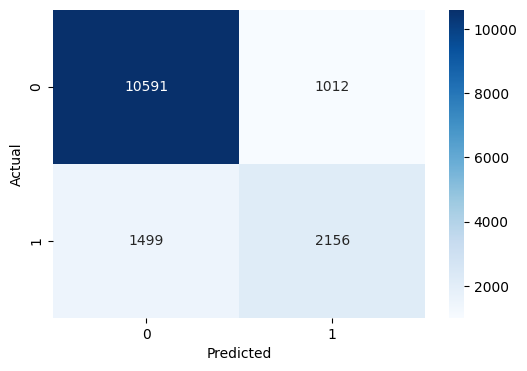

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
evaluate(X_train,X_test,y_train,y_test,KNeighborsClassifier(),knn_params,"KNeighborsClassifier")

CONCLUSIONS:

In [43]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results_df

,Model,Estimator,Accuracy,F1_Score,ROC_AUC_SCORE
0,LGBMClassifier,"LGBMClassifier(max_depth=5, n_estimators=200, ...",0.871608,0.711275,0.926291
1,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.870822,0.709421,0.926253
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.870756,0.709829,0.925891
3,RandomForestClassifier,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.861515,0.680671,0.913173
4,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=3, random_st...",0.861188,0.687703,0.916243
5,DecisionTreeClassifier,"DecisionTreeClassifier(criterion='entropy', ma...",0.851947,0.675943,0.897181
6,KNeighborsClassifier,"KNeighborsClassifier(n_neighbors=9, p=1)",0.835431,0.631980,0.876232


LGBMClassifier achieved the best overall performance across all metrics.

Boosting models (LGBM,XGB,GradientBoost) consistently outperformed bagging (Random Forest) and base learners (Decision Trees,KNN).

All tree-based models significantly outperformed KNN.